## Linear Regression

Linear Regression is a Supervised learning algorithm in which target variable is continuous variable.

Assumptions of Linear Regression:
1. The assumption about the form of the model:
    1. It is assumed that there is a linear relationship between the dependent and independent variables. It is known as the ‘linearity assumption’.
2. Assumptions about the residuals:
    1. Normality assumption: It is assumed that the error terms, ε(i), are normally distributed.
    2. Zero mean assumption: It is assumed that the residuals have a mean value of zero, i.e., the error terms are normally distributed around zero.
    3. Constant variance assumption: It is assumed that the residual terms have the same (but unknown) variance, σ2 . This assumption is also known as the assumption of homogeneity or homoscedasticity.
    4. Independent error assumption: It is assumed that the residual terms are independent of each other, i.e. their pair-wise covariance is zero.
3. Assumptions about the estimators:
    1. The independent variables are measured without error.
    2. The independent variables are linearly independent of each other, i.e. there is no multicollinearity in the data.

## 1. Libraries

In [1]:
# importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# statsmodels libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
# sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
# import warning
import warnings
warnings.filterwarnings('ignore')

## 2. Exploring Dataset :- Housing Data

In [2]:
# reading Housing data
data=pd.read_csv('Housing.csv')

In [3]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
# information about all the colums of our data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


## 3. Visualise Dataset

We have two different data types of features variables
1. Numeric variable
2. Cateorical variable

Visualising Numerical Variables

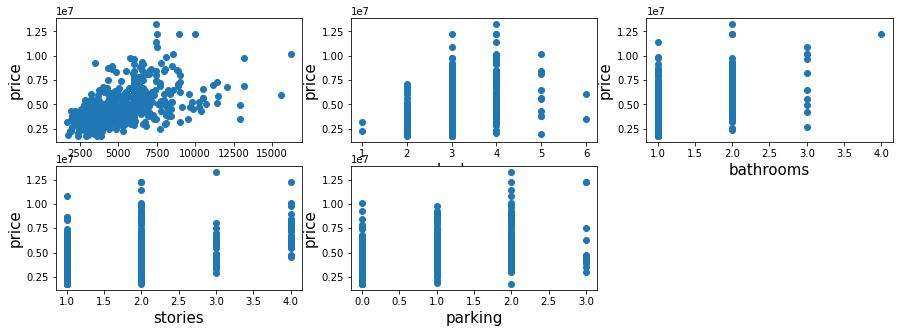

In [5]:
# visaulise the relationship of target variable and numerical variables
numerical_variable=['area','bedrooms','bathrooms','stories','parking']
j=1

plt.figure(figsize=(15,5))
for i in numerical_variable:
    plt.subplot(2,3,j)
    j=j+1
    plt.scatter(data[i],data["price"])
    plt.xlabel(i,fontsize=15)
    plt.ylabel('price',fontsize=15)

Visualising Categorical Variables

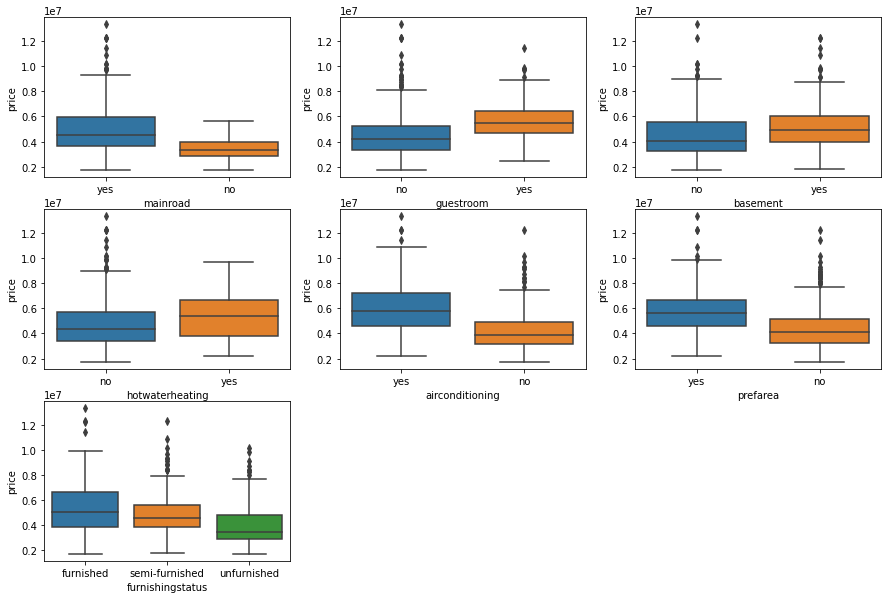

In [6]:
categorical_variable=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']

plt.figure(figsize=(15,10))
j=1
for i in categorical_variable:
    plt.subplot(3,3,j)
    j=j+1
    sns.boxplot(x = i, y = 'price', data = data)

## 4. Data Preparation

We can see we have 6 features having "Yes"/"No" input. To fit our model we need to change these columns to numeric. So we will change "Yes" to 1 and "No" with 0

In [7]:
column_with_yes_no=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']

data[column_with_yes_no]=data[column_with_yes_no].replace({'yes':1,'no':0})

In [8]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


We have one more categorical data type column "furnishingstatus". We will create two dummy columns ( because thrid column can be eplained by first two columns ) for it using "get_dummies".

In [9]:
new_columns=pd.get_dummies(data["furnishingstatus"],drop_first=True)

In [10]:
housing_data=pd.concat([data,new_columns],axis=1)

In [11]:
housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [12]:
housing_data.drop('furnishingstatus',axis=1,inplace=True)

In [13]:
housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


## 5. Data split into Train and Test

In [14]:
X=housing_data[list(set(housing_data.columns)-set('price'))]
y=housing_data['price']

In [15]:
train,test=train_test_split(X,train_size=0.7,random_state=100)

In [16]:
train.shape,test.shape

((381, 14), (164, 14))

Here we can see all the columns except 'area' hae smaller values. So to get unbiased model result its good to do stadardization of columns except for the columns that we changed categorical to numeric( yes/no columns and dummy columns)

In [17]:
from sklearn.preprocessing import MinMaxScaler

numerical_variable = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

train[numerical_variable]=MinMaxScaler().fit_transform(train[numerical_variable])

Checking correlation between columns

In [18]:
train.corr()

,mainroad,basement,prefarea,price,parking,semi-furnished,stories,bedrooms,hotwaterheating,area,unfurnished,bathrooms,guestroom,airconditioning
mainroad,1.000000,0.067937,0.191465,0.319208,0.200389,0.012254,0.129427,0.012655,-0.003779,0.308272,-0.129101,0.031716,0.106875,0.056375
basement,0.067937,1.000000,0.203933,0.200743,0.042203,0.049430,-0.155313,0.120618,0.023806,0.106971,-0.077562,0.120857,0.367345,0.082892
prefarea,0.191465,0.203933,1.000000,0.344543,0.081780,0.001157,0.072192,0.076503,-0.074318,0.279878,-0.078983,0.061584,0.161877,0.099840
price,0.319208,0.200743,0.344543,1.000000,0.352081,0.078917,0.409464,0.349825,0.141202,0.532025,-0.270114,0.524246,0.265877,0.433162
parking,0.200389,0.042203,0.081780,0.352081,1.000000,0.044331,0.009708,0.120363,0.074999,0.365658,-0.138313,0.138241,-0.010240,0.188132
semi-furnished,0.012254,0.049430,0.001157,0.078917,0.044331,1.000000,-0.001883,0.049111,0.064641,-0.040753,-0.584683,0.065987,0.000632,-0.026475
stories,0.129427,-0.155313,0.072192,0.409464,0.009708,-0.001883,1.000000,0.419582,-0.001538,0.069274,-0.088199,0.295689,0.068088,0.279779
bedrooms,0.012655,0.120618,0.076503,0.349825,0.120363,0.049111,0.419582,1.000000,0.085818,0.097462,-0.125921,0.346925,0.089488,0.161890
hotwaterheating,-0.003779,0.023806,-0.074318,0.141202,0.074999,0.064641,-0.001538,0.085818,1.000000,0.037719,-0.063025,0.112732,0.018394,-0.153801
area,0.308272,0.106971,0.279878,0.532025,0.365658,-0.040753,0.069274,0.097462,0.037719,1.000000,-0.131524,0.163446,0.155665,0.215888


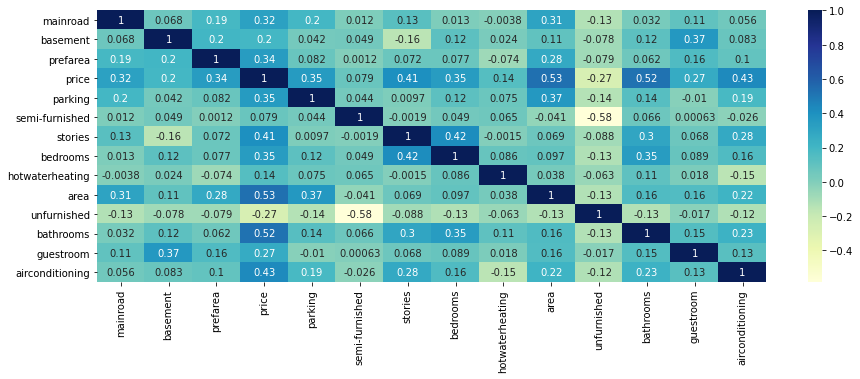

In [19]:
plt.figure(figsize=(15,5))
sns.heatmap(train.corr(),annot=True,cmap='YlGnBu')
plt.show()

We can see correlation between column 'price' and column 'area' is highest. So lets make the univariate model by taking feature column as 'area'.

## 6. Simple Linear Regression

Simple linear regression is a method for predicting a quantitative response using a single feature.

Equation of Simple Linear Regression is:-

y=β0+β1x 

where

β0 s the constant of intercept,

β1 is the coefficient for x,

x is data points,

y is output of each data point(x)

Lets plot the graph between the house's area and it's price.

In [20]:
X_train=train[list(set(train.columns)-set('price'))]
y_train=train['price']

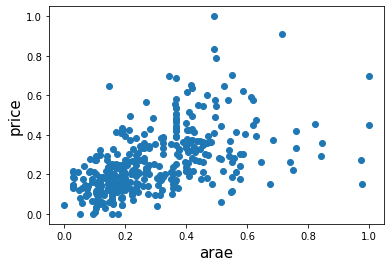

In [21]:
plt.scatter(X_train['area'],X_train['price'])
plt.xlabel('arae',fontsize=15)
plt.ylabel('price',fontsize=15)
plt.show()

Now lets find model coefficient using `Statsmodel`

In [22]:
# add constant
X_train_lm  = sm.add_constant(X_train['area'])

# creating OLS model
lm1= sm.OLS(y_train,X_train_lm).fit()

# parameters
lm1.params.round(5)

const    0.12689
area     0.46219
dtype: float64

Now lets find model coefficient using `Scikit-Learn`

In [23]:
lm2=LinearRegression()

lm2.fit(np.array(X_train['area']).reshape(-1,1),y_train)
print(lm2.intercept_.round(5))
print(lm2.coef_.round(5))

0.12689
[0.46219]


## 7. Use this model for prediction

$y = β0+ β1x$

$y= 0.12689 + 0.46219*x$

Lets take the case if are of any house is 10000 sq foot than the price of that house according of our model would be

$y= 0.12689 + 0.46219*10000 =4622$

In [24]:
lm2.predict(np.array([10000]).reshape(1,-1))

array([4622.04678263])

## 8. Plotting the least square Lines

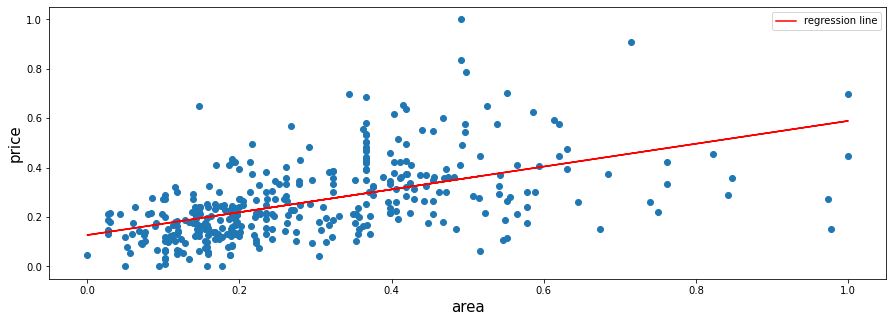

In [25]:
plt.figure(figsize=(15,5))
plt.scatter(X_train['area'],X_train['price'])
plt.plot(X_train_lm.iloc[:, 1], 0.127 + 0.462*X_train_lm.iloc[:, 1],'r',label='regression line')
plt.xlabel('area',fontsize=15)
plt.ylabel('price',fontsize=15)
plt.legend()
plt.show()

In [26]:
lm1.rsquared

0.2830500764266308

In [27]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           3.15e-29
Time:                        18:14:25   Log-Likelihood:                 227.23
No. Observations:                 381   AIC:                            -450.5
Df Residuals:                     379   BIC:                            -442.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1269      0.013      9.853      0.0

The main difference between adjusted R-squared and R-square is that R-squared describes the amount of variance of the dependent variable represented by every single independent variable, while adjusted R-squared measures variation explained by only the independent variables that actually affect the dependent variable.


## 9. Residual Analysis

`StastsModel`

In [28]:
y_train_pred=lm1.predict(X_train_lm)

Text(0.5, 0, 'Errors')

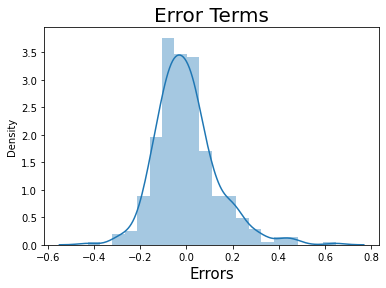

In [29]:
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 15)     

`Scikit-Learn`

In [30]:
y_train_pred=lm2.predict(np.array(X_train['area']).reshape(-1,1))

Text(0.5, 0, 'Errors')

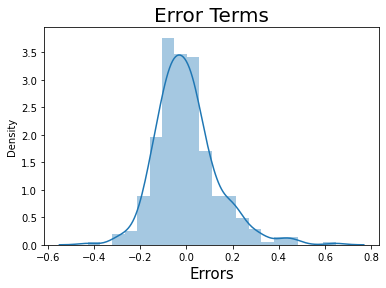

In [31]:
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 15)     

## 10. Making Prediction

In [32]:
from sklearn.preprocessing import MinMaxScaler

numerical_variable = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

test[numerical_variable]=MinMaxScaler().fit_transform(test[numerical_variable])

In [33]:
X_test=test[list(set(test.columns)-set('price'))]
y_test=test['price']

`StatsModel`

In [34]:
X_test_lm=sm.add_constant(X_test['area'])
y_test_pred=lm1.predict(X_test_lm)

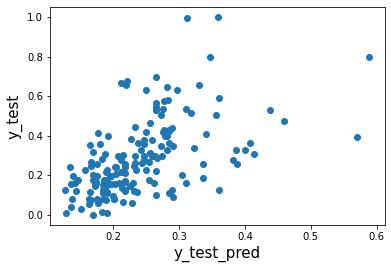

In [35]:
plt.scatter(y_test_pred,y_test)
plt.xlabel('y_test_pred',fontsize=15)
plt.ylabel('y_test',fontsize=15)
plt.show()

In [36]:
print("MAE =",metrics.mean_absolute_error(y_test, y_test_pred))
print("MSE =",metrics.mean_squared_error(y_test, y_test_pred))
print("RMSE =",np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

MAE = 0.12069533510155059
MSE = 0.028092473996349124
RMSE = 0.1676080964522571


`Scikit-Learn`

In [37]:
y_test_pred=lm2.predict(np.array(X_test['area']).reshape(-1,1))

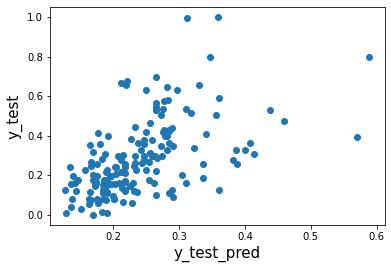

In [38]:
plt.scatter(y_test_pred,y_test)
plt.xlabel('y_test_pred',fontsize=15)
plt.ylabel('y_test',fontsize=15)
plt.show()

In [39]:
print("MAE =",metrics.mean_absolute_error(y_test, y_test_pred))
print("MSE =",metrics.mean_squared_error(y_test, y_test_pred))
print("RMSE =",np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

MAE = 0.12069533510155063
MSE = 0.028092473996349142
RMSE = 0.16760809645225716


## 11. Multiple Linear Regression


Adding all the features to the model

In [40]:
y_train=train.pop('price')
X_train=train

In [41]:
# add constant
X_train_lm  = sm.add_constant(X_train)

# creating OLS model
lm3= sm.OLS(y_train,X_train_lm).fit()

# parameters
lm3.params.round(5)

const              0.02003
mainroad           0.05044
basement           0.02159
prefarea           0.05943
parking            0.06074
semi-furnished     0.00092
stories            0.10852
bedrooms           0.04673
hotwaterheating    0.08486
area               0.23466
unfurnished       -0.03101
bathrooms          0.19082
guestroom          0.03043
airconditioning    0.06688
dtype: float64

In [42]:
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           8.83e-83
Time:                        18:14:29   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0200      0.021     

## 12. Hypothesis Testing and P values

**Hypothesis Testing**
Hypothesis testing is a statistical measure to test the result of our data. There are two types of hypothesis:
1. Null Hypothesis
2. Alternative Hypothesis

For Null Hypothesis we can choose there is no relationship between 'sales' and other features available in the dataset i.e. coefficien of that feature is zero.

So the alternative hypothesis would be :- There is an relationship between 'sales' and other features avalilable in the dataset i.e. coefficient of that feature is not zero.

To test the hypothesis

1. Reject the Null Hypothesis

    1. There is a relationship
    
    2. If the 95% confidence interval does not include zero


2. Fail to reject the Null Hypothesis

    1. There is no relationship
    2. If the 95% confidence interval includes zero
    
**P Value**

P value denotes the probability of the feature that the coefficient of that feature is actually zero. So for having 95 % confdence in our model we consider the features having p value less than 0.05. That means we reject the null hypothesis and there is a relationship.

For our dataset p value of feature 'semi-furnished' is too high (0.938). So we fail to reject our null hypothesis and there is no relationship.

In [43]:
#drop column ' semifurnished'
X_train.drop('semi-furnished',axis=1,inplace=True)

In [44]:
# add constant
X_train_lm  = sm.add_constant(X_train)

# creating OLS model
lm3= sm.OLS(y_train,X_train_lm).fit()

# parameters
lm3.params.round(5)

print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     65.61
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           1.07e-83
Time:                        18:14:29   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -737.6
Df Residuals:                     368   BIC:                            -686.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0207      0.019     

## 13. VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. The formula for calculating VIF is:

$ VIF_i = \frac{1}{1 - {R_i}^2} $

And we generally consider the features haiving VIF less than 5.

In [45]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,bedrooms,6.59
0,mainroad,5.68
7,area,4.67
4,stories,2.69
3,parking,2.12
1,basement,2.01
11,airconditioning,1.77
9,bathrooms,1.67
2,prefarea,1.51
10,guestroom,1.47


In [46]:
#drop column ' bedrooms'
X_train.drop('bedrooms',axis=1,inplace=True)

In [47]:
# add constant
X_train_lm  = sm.add_constant(X_train)

# creating OLS model
lm3= sm.OLS(y_train,X_train_lm).fit()

# parameters
lm3.params.round(5)

print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           2.73e-84
Time:                        18:14:29   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0357      0.015     

In [48]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,mainroad,4.79
6,area,4.55
4,stories,2.23
3,parking,2.10
1,basement,1.87
10,airconditioning,1.76
8,bathrooms,1.61
2,prefarea,1.50
9,guestroom,1.46
7,unfurnished,1.33


So Now all the features having p value less than 0.05 and CIF less that 5. the remaining features we will use for ur final model.

## 14. Residual Analysis for Multiple Linear Regression

`StastsModel`

In [49]:
X_train_lm = sm.add_constant(X_train)
y_train_pred=lm3.predict(X_train_lm)

Text(0.5, 0, 'Errors')

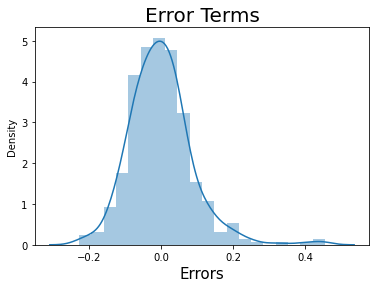

In [50]:
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 15)     

## 15. Making Prediction Using final model

`StatsModel`

In [51]:
final_features=['mainroad','area','stories','parking','basement','airconditioning','bathrooms',
                'prefarea','guestroom','unfurnished','hotwaterheating']

X_test =X_test[final_features]

In [52]:
X_test_lm=sm.add_constant(X_test)
y_test_pred=lm3.predict(X_test_lm)

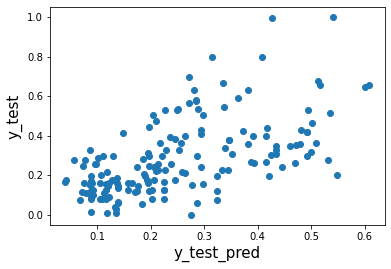

In [53]:
plt.scatter(y_test_pred,y_test)
plt.xlabel('y_test_pred',fontsize=15)
plt.ylabel('y_test',fontsize=15)
plt.show()

In [54]:
print("MAE =",metrics.mean_absolute_error(y_test, y_test_pred))
print("MSE =",metrics.mean_squared_error(y_test, y_test_pred))
print("RMSE =",np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

MAE = 0.11813237365555174
MSE = 0.025276713910291404
RMSE = 0.15898652115915804


In [55]:
# final Parameter
lm3.params.round(3)

const              0.036
mainroad           0.049
basement           0.024
prefarea           0.060
parking            0.063
stories            0.118
hotwaterheating    0.086
area               0.235
unfurnished       -0.032
bathrooms          0.196
guestroom          0.030
airconditioning    0.067
dtype: float64

**So our final model is:**

$ price = 0.0356 + 0.030 \times guestroom + 0.063 \times parking+ 0.118 \times stories+
0.196 \times bathrooms+ 0.067 \times airconditioning+ 0.235 \times area+ 0.024 \times basement+ 0.049 \times mainroad
+ 0.086 \times hotwaterheating+ 0.060 \times prefarea- 0.032 \times unfurnished$